In [2]:
using Pkg
Pkg.activate("MNIST")

  Activating project at `/data/gpfs/projects/punim0638/stephenz/QROT/notebooks/ex_MNIST/MNIST`


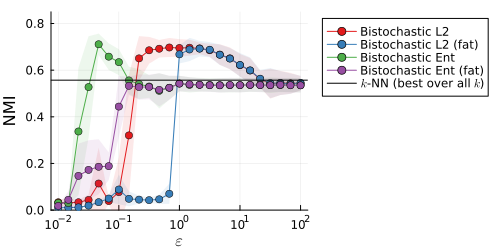

In [178]:
using Glob
using CSV
using DataFrames
using Plots
using StatsPlots
using StatsBase
using LaTeXStrings
using ColorSchemes
pal=palette(:Set1_9)
fnames = Glob.glob("output/mnist_results_N_100_*.csv")
df = [CSV.read(f, DataFrame) for f in fnames];
plot(; ylim = (0.0, 0.85), size = (500, 250))
errorline!(df[1].eps_quad, hcat([x.quad for x in df]...), xscale = :log10, marker = :circle, label = "Bistochastic L2", legend = :outertopright, color = pal[1], groupcolor = pal[1], xlabel = L"\varepsilon", ylabel = "NMI")
errorline!(df[1].eps_quad, hcat([x.quad_fat for x in df]...), xscale = :log10, marker = :circle, label = "Bistochastic L2 (fat)", color = pal[2], groupcolor = pal[2])
errorline!(df[1].eps_ent, hcat([x.ent for x in df]...), xscale = :log10, marker = :circle, label = "Bistochastic Ent", color = pal[3], groupcolor = pal[3])
errorline!(df[1].eps_ent, hcat([x.ent_fat for x in df]...), xscale = :log10, marker = :circle, label = "Bistochastic Ent (fat)", color = pal[4], groupcolor = pal[4])
hline!([mean([maximum(x.knn) for x in df]), ], color = :black, label = L"$k$-NN (best over all $k$)")